In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

In [18]:
X = np.array([1,1,5,4,4,8,8,2])
y = np.array([5,2,8,8,9,3,2,1])

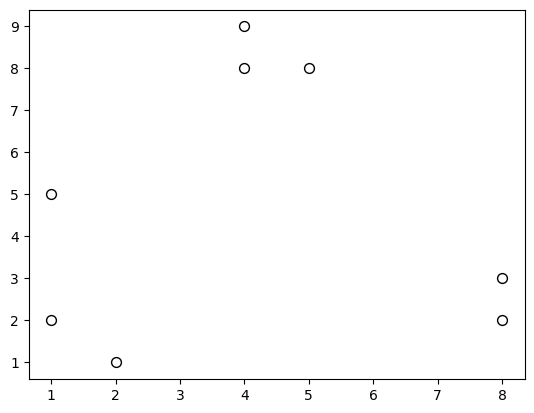

In [19]:
plt.scatter(
    X,y,
    c="white", marker='o',
    edgecolor='black', s=50
)
plt.show()

In [61]:
km = KMeans(
    n_clusters=3,init='random',
    n_init=1,max_iter=10,
    tol=1e-04,random_state=0
)

y_km = km.fit_predict(X.reshape(-1,1))
y_km

array([2, 2, 1, 1, 1, 0, 0, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

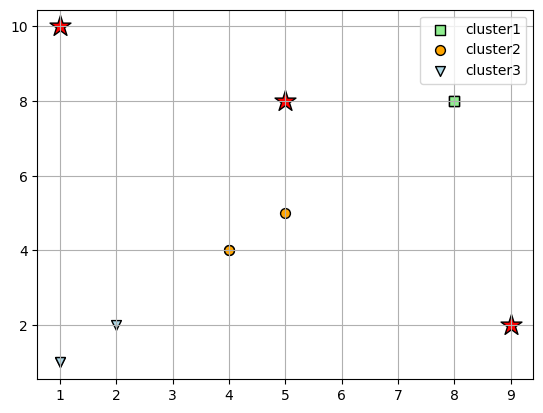

In [67]:
plt.scatter(
    X[y_km == 0], X[y_km == 0],
    s = 50, c='lightgreen',
    marker='s',edgecolor='black',
    label='cluster1' 
)

plt.scatter(
    X[y_km == 1], X[y_km == 1],
    s = 50, c='orange',
    marker='o',edgecolor='black',
    label='cluster2' 
)

plt.scatter(
    X[y_km == 2], X[y_km == 2],
    s = 50, c='lightblue',
    marker='v',edgecolor='black',
    label='cluster3' 
)

plt.scatter(
    1,10,s=250,c='red',marker='*', edgecolor="black"
)

plt.scatter(
    5,8,s=250,c='red',marker='*', edgecolor='black'
)

plt.scatter(
    9,2,s=250,c='red',marker='*', edgecolor='black'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.show

In [82]:
distortions = []
for i in range(1,5):
    km = KMeans(
        n_clusters=i,init='random',
        n_init=10,max_iter=300,
        tol=1e-04,random_state=0
    )
    km.fit(X.reshape(-1,1))
    distortions.append(km.inertia_)
print(distortions)

[54.875, 14.833333333333334, 1.3333333333333335, 0.6666666666666667]


In [83]:
from kneed import KneeLocator
kl=KneeLocator(range(1,5),distortions,curve="convex",direction="decreasing")
kl.elbow

2

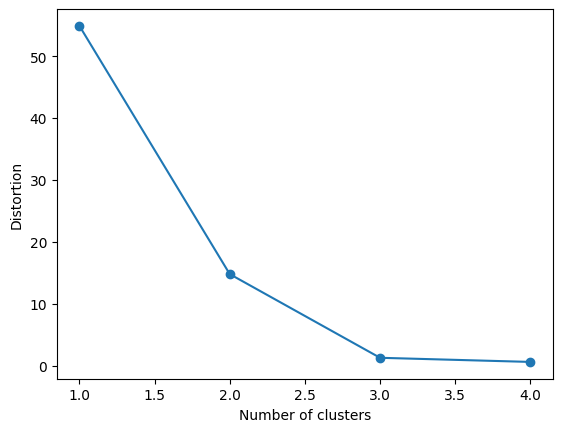

In [85]:
plt.plot(range(1,5),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()